In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [6]:
df = pd.read_csv('data_science_job.csv')

In [7]:
df.sample(5)

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,training_hours,target
16341,12124,city_160,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,11.0,<10,Pvt Ltd,17.0,0.0
15430,30592,city_105,0.794,Male,Has relevent experience,no_enrollment,Masters,STEM,19.0,50-99,Pvt Ltd,79.0,0.0
14419,21280,city_21,0.624,NaN,No relevent experience,Full time course,Graduate,STEM,0.0,<10,Pvt Ltd,99.0,0.0
5321,101,city_136,0.897,Male,Has relevent experience,no_enrollment,Masters,STEM,19.0,10/49,Funded Startup,12.0,0.0
18668,4698,city_84,0.698,Male,Has relevent experience,no_enrollment,Graduate,STEM,13.0,NaN,NaN,68.0,0.0


In [8]:
df.isnull().sum()

enrollee_id                  0
city                         0
city_development_index     479
gender                    4508
relevent_experience          0
enrolled_university        386
education_level            460
major_discipline          2813
experience                  65
company_size              5938
company_type              6140
training_hours             766
target                       0
dtype: int64

In [9]:
df.isnull().mean()*100

enrollee_id                0.000000
city                       0.000000
city_development_index     2.500261
gender                    23.530640
relevent_experience        0.000000
enrolled_university        2.014824
education_level            2.401086
major_discipline          14.683161
experience                 0.339284
company_size              30.994885
company_type              32.049274
training_hours             3.998330
target                     0.000000
dtype: float64

In [10]:
df.shape

(19158, 13)

In [11]:
cols = [var for var in df.columns if df[var].isnull().mean() < 0.05 and df[var].isnull().mean() > 0]
cols

['city_development_index',
 'enrolled_university',
 'education_level',
 'experience',
 'training_hours']

In [12]:
df[cols].sample(5)


,city_development_index,enrolled_university,education_level,experience,training_hours
7920,0.926,Full time course,High School,6.0,61.0
14479,0.910,Part time course,High School,6.0,12.0
859,0.920,no_enrollment,Masters,10.0,16.0
1497,0.698,Full time course,Masters,9.0,30.0
8563,0.920,no_enrollment,Graduate,3.0,25.0


In [13]:
df['education_level'].value_counts()

education_level
Graduate          11598
Masters            4361
High School        2017
Phd                 414
Primary School      308
Name: count, dtype: int64

In [14]:
len(df[cols].dropna()) / len(df)

0.8968577095730244

In [15]:
new_df = df[cols].dropna()
df.shape, new_df.shape

((19158, 13), (17182, 5))

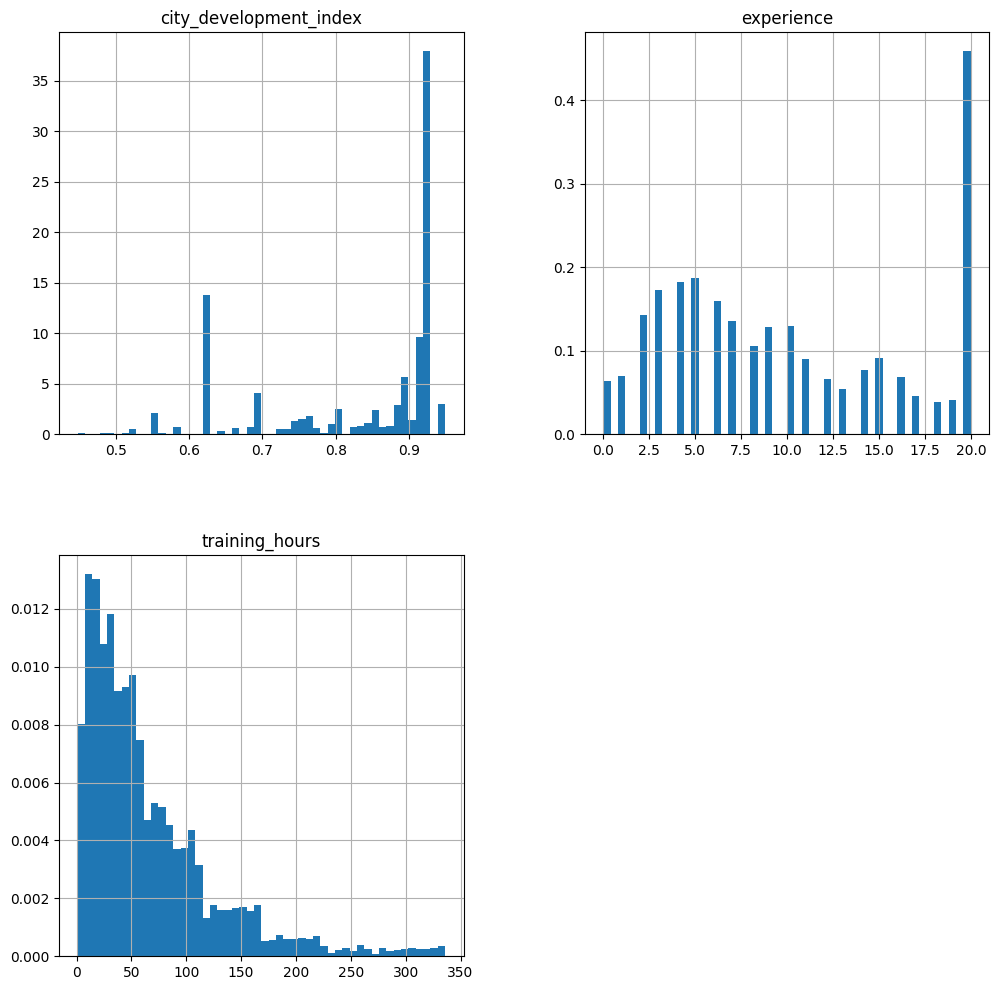

In [16]:
# Distribution of the dataset after dropping the rows
new_df.hist(bins=50, density=True, figsize=(12, 12))
plt.show()

<Axes: >

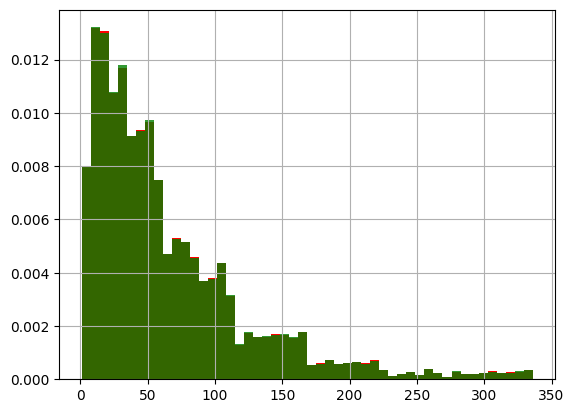

In [17]:
fig = plt.figure()
ax = fig.add_subplot(111)

# original data
df['training_hours'].hist(bins=50, ax=ax, density=True, color='red')

# data after cca, the argument alpha makes the color transparent, so we can
# see the overlay of the 2 distributions
new_df['training_hours'].hist(bins=50, ax=ax, color='green', density=True, alpha=0.8)

<Axes: ylabel='Density'>

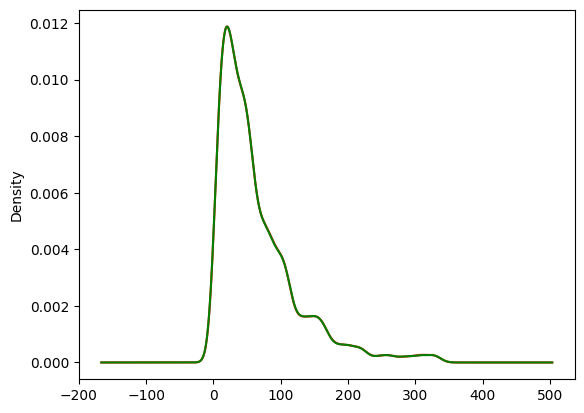

In [18]:
fig = plt.figure()
ax = fig.add_subplot(111)

# original data
df['training_hours'].plot.density(color='red')

# data after cca
new_df['training_hours'].plot.density(color='green')

<Axes: >

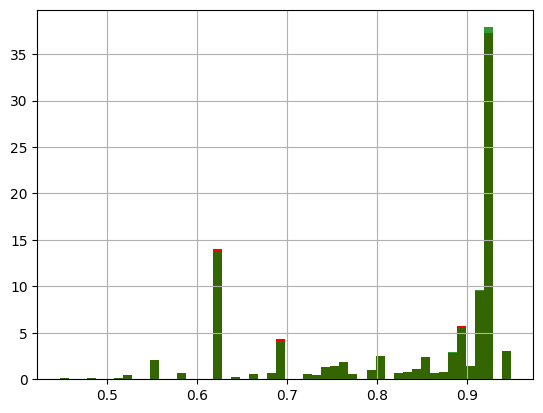

In [19]:
fig = plt.figure()
ax = fig.add_subplot(111)

# original data
df['city_development_index'].hist(bins=50, ax=ax, density=True, color='red')

# data after cca, the argument alpha makes the color transparent, so we can
# see the overlay of the 2 distributions
new_df['city_development_index'].hist(bins=50, ax=ax, color='green', density=True, alpha=0.8)

<Axes: ylabel='Density'>

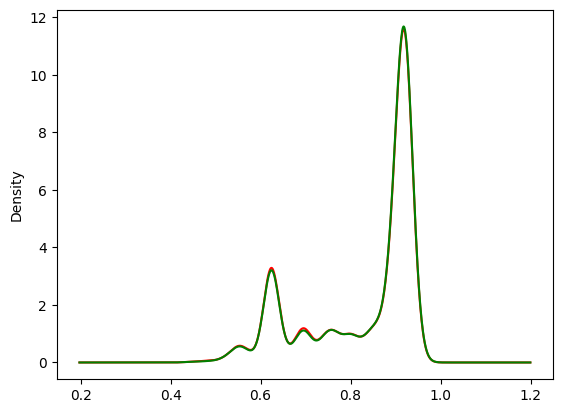

In [20]:
fig = plt.figure()
ax = fig.add_subplot(111)

# original data
df['city_development_index'].plot.density(color='red')

# data after cca
new_df['city_development_index'].plot.density(color='green')

<Axes: >

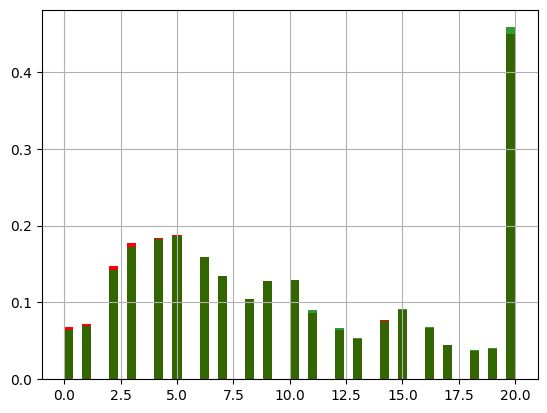

In [21]:
fig = plt.figure()
ax = fig.add_subplot(111)

# original data
df['experience'].hist(bins=50, ax=ax, density=True, color='red')

# data after cca, the argument alpha makes the color transparent, so we can
# see the overlay of the 2 distributions
new_df['experience'].hist(bins=50, ax=ax, color='green', density=True, alpha=0.8)

<Axes: ylabel='Density'>

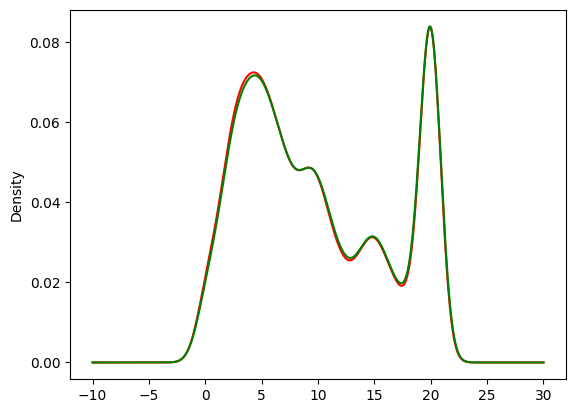

In [22]:
fig = plt.figure()
ax = fig.add_subplot(111)

# original data
df['experience'].plot.density(color='red')

# data after cca
new_df['experience'].plot.density(color='green')

In [23]:
temp = pd.concat([
            # percentage of observations per category, original data
            df['enrolled_university'].value_counts() / len(df),

            # percentage of observations per category, cca data
            new_df['enrolled_university'].value_counts() / len(new_df)
        ],
        axis=1)

# add column names
temp.columns = ['original', 'cca']

temp

,original,cca
enrolled_university,,
no_enrollment,0.721213,0.735188
Full time course,0.196106,0.200733
Part time course,0.062533,0.064079


In [24]:
temp = pd.concat([
            # percentage of observations per category, original data
            df['education_level'].value_counts() / len(df),

            # percentage of observations per category, cca data
            new_df['education_level'].value_counts() / len(new_df)
        ],
        axis=1)

# add column names
temp.columns = ['original', 'cca']

temp

,original,cca
education_level,,
Graduate,0.605387,0.619835
Masters,0.227633,0.234082
High School,0.105282,0.107380
Phd,0.021610,0.022116
Primary School,0.016077,0.016587
